In [9]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import math
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
sns.set(font_scale=2)
pylab.rcParams['figure.figsize'] = (24, 18)

names=['ENI','SAN','SAF','BNP','ACA']
df=pd.DataFrame()
for i in names:
    df[i]=quandl.get('EURONEXT/'+i,token=token).Last



In [10]:
## Take a random subsection of stocks

df.head()

,ENI,SAN,SAF,BNP,ACA
Date,,,,,
2014-02-13,16.92,NaN,NaN,NaN,NaN
2014-02-17,17.26,73.01,54.27,58.45,10.795
2014-02-18,17.35,73.21,53.81,58.38,10.790
2014-02-20,17.46,73.57,52.43,58.52,11.175
2014-02-21,17.54,74.00,52.00,58.63,11.090


In [337]:
ret = (df.pct_change(1)+1)

In [338]:
ret.head()

,ENI,SAN,SAF,BNP,ACA
Date,,,,,
2014-02-13,NaN,NaN,NaN,NaN,NaN
2014-02-17,1.020095,NaN,NaN,NaN,NaN
2014-02-18,1.005214,1.002739,0.991524,0.998802,0.999537
2014-02-20,1.006340,1.004917,0.974354,1.002398,1.035681
2014-02-21,1.004582,1.005845,0.991799,1.001880,0.992394


In [339]:
strategy = ((df-df.shift(14))/df.shift(14)).iloc[::14, :].abs()

In [340]:
allocation = strategy.div(strategy.sum(axis=1), axis=0)

In [341]:
df2 = pd.DataFrame(index=df.index)
alloc = pd.merge(df2, allocation, left_index=True, right_index=True,how="left")

In [342]:
alloc.ffill(inplace=True)
alloc = alloc.dropna()

In [343]:
alloc.iloc[0,:] = 1/len(alloc.columns)

In [344]:
alloc.head(30)

,ENI,SAN,SAF,BNP,ACA
Date,,,,,
2014-04-09,0.200000,0.200000,0.200000,0.200000,0.200000
2014-04-11,0.309835,0.350026,0.211444,0.068040,0.060655
2014-04-14,0.309835,0.350026,0.211444,0.068040,0.060655
2014-04-15,0.309835,0.350026,0.211444,0.068040,0.060655
2014-04-16,0.309835,0.350026,0.211444,0.068040,0.060655
2014-04-17,0.309835,0.350026,0.211444,0.068040,0.060655
2014-04-22,0.309835,0.350026,0.211444,0.068040,0.060655
2014-04-23,0.309835,0.350026,0.211444,0.068040,0.060655
2014-04-25,0.309835,0.350026,0.211444,0.068040,0.060655


In [345]:
## set the first one equal to one 
ret.loc[alloc.iloc[0,:].to_frame().columns.values[0],:]=1

In [346]:
alloc_ret = alloc*ret

In [347]:
alloc_ret["Return"] = alloc_ret.sum(axis=1)

In [353]:
alloc_ret = alloc_ret.dropna()
alloc_ret.head(10)

,ENI,SAN,SAF,BNP,ACA,Return
Date,,,,,,
2014-04-09,0.200000,0.200000,0.200000,0.200000,0.200000,1.000000
2014-04-11,0.309835,0.340595,0.209863,0.065792,0.058643,0.984728
2014-04-14,0.311203,0.353038,0.208455,0.067644,0.059763,1.000103
2014-04-15,0.314091,0.345315,0.210183,0.066609,0.059667,0.995865
2014-04-16,0.310675,0.353573,0.218213,0.068954,0.062243,1.013659
2014-04-17,0.311510,0.353350,0.214292,0.068315,0.061795,1.009263
2014-04-22,0.311168,0.357678,0.211955,0.069513,0.061641,1.011955
2014-04-23,0.311825,0.349663,0.203714,0.067172,0.060156,0.992531
2014-04-25,0.298793,0.345983,0.211268,0.068188,0.060073,0.984305


In [354]:
alloc_ret["Normal_Return"] = alloc_ret["Return"].pct_change()

In [355]:
### Well you can really think of two types of benchmarks - an index, and buy and hold on
### the same stocks the strategy is applies one

In [356]:
alloc_ret.iloc[0,-1] = 0

In [357]:
alloc_ret.head()

,ENI,SAN,SAF,BNP,ACA,Return,Normal_Return
Date,,,,,,,
2014-04-09,0.200000,0.200000,0.200000,0.200000,0.200000,1.000000,0.000000
2014-04-11,0.309835,0.340595,0.209863,0.065792,0.058643,0.984728,-0.015272
2014-04-14,0.311203,0.353038,0.208455,0.067644,0.059763,1.000103,0.015613
2014-04-15,0.314091,0.345315,0.210183,0.066609,0.059667,0.995865,-0.004237
2014-04-16,0.310675,0.353573,0.218213,0.068954,0.062243,1.013659,0.017868


In [358]:
alloc_ret["Cummulative Product"] = alloc_ret["Return"].cumprod()

In [359]:
portfolio_start = 100000

port = alloc * portfolio_start 

In [360]:
port = port.multiply(alloc_ret["Cummulative Product"], axis=0)

In [361]:
port_rebalance = port.iloc[::14, :].head() ## 14 day rebalance

In [362]:
txn_amount = port_rebalance-port_rebalance.shift(1)

In [363]:
txn_dollars = txn_amount.stack().reset_index() 

In [364]:
txn_dollars.head(10)

,Date,level_1,0
0,2014-05-08,ENI,1265.222232
1,2014-05-08,SAN,-3069.985975
2,2014-05-08,SAF,-3959.810705
3,2014-05-08,BNP,9258.438927
4,2014-05-08,ACA,-1490.676177
5,2014-06-05,ENI,-9689.040396
6,2014-06-05,SAN,-15190.731867
7,2014-06-05,SAF,28298.817567
8,2014-06-05,BNP,-5318.903541
9,2014-06-05,ACA,1730.974181


In [365]:
df3 = pd.DataFrame(index=txn_amount.index)
prices = pd.merge(df3, df, left_index=True, right_index=True,how="left")

In [366]:
prices.head()
quantity = txn_amount/prices

In [367]:
quantity = quantity.round(0).fillna(value=0)

In [368]:
prices = prices.stack().reset_index() 
quantity = quantity.stack().reset_index() 

In [372]:
quantity.head(10)

,Date,level_1,0
0,2014-04-09,ENI,0.0
1,2014-04-09,SAN,0.0
2,2014-04-09,SAF,0.0
3,2014-04-09,BNP,0.0
4,2014-04-09,ACA,0.0
5,2014-05-08,ENI,67.0
6,2014-05-08,SAN,-39.0
7,2014-05-08,SAF,-84.0
8,2014-05-08,BNP,173.0
9,2014-05-08,ACA,-124.0


In [373]:
txn_dollars.columns = ["date","symbol","txn_dollars"]
quantity.columns = ["date","symbol","amount"]
prices.columns = ["date","symbol","price"]

In [407]:
mergy = pd.merge(txn_dollars, quantity, on=["date","symbol"],how="left")

mergy = pd.merge(mergy, prices, on=["date","symbol"],how="left")

mergy["sid"] = pd.factorize(mergy['symbol'])[0] + 1

mergy = mergy.set_index("date",drop=True)

In [408]:
mergy.head()

,symbol,txn_dollars,amount,price,sid
date,,,,,
2014-05-08,ENI,1265.222232,67.0,18.900,1
2014-05-08,SAN,-3069.985975,-39.0,79.070,2
2014-05-08,SAF,-3959.810705,-84.0,47.230,3
2014-05-08,BNP,9258.438927,173.0,53.530,4
2014-05-08,ACA,-1490.676177,-124.0,12.045,5


In [409]:
port.head()

,ENI,SAN,SAF,BNP,ACA
Date,,,,,
2014-04-09,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
2014-04-11,30510.318888,34468.071561,20821.515927,6700.047878,5972.830319
2014-04-14,30513.447505,34471.606017,20823.651025,6700.734920,5973.442791
2014-04-15,30387.272876,34329.064205,20737.544188,6673.027047,5948.742306
2014-04-16,30802.332469,34797.964704,21020.798191,6764.173887,6029.996145


In [410]:
alloc_ret["Cummulative Product"].mean()

1.1684641177483073

In [429]:
positions = port.ffill().bfill().tz_localize('UTC')
positions["cash"] = 6000
returns = alloc_ret["Normal_Return"].fillna(value=0)
transactions = mergy.ffill().bfill().tz_localize('UTC')

In [430]:
benchmark = pd.read_csv("VGK.csv")

In [431]:
benchmark = benchmark.set_index("Date", drop=True)
benchmark = benchmark[["Adj Close"]]

benchmark["Return"] = benchmark["Adj Close"].pct_change()

In [432]:
benchmark["Return Cum"] = benchmark["Return"].pct_change().cumprod()

benchmark.head()

df4 = pd.DataFrame(index=alloc_ret.index)
benchmark = pd.merge(df4, benchmark, left_index=True, right_index=True,how="left")

benchmark2 = benchmark["Return Cum"].fillna(value=0)
benchmark = benchmark["Return"].fillna(value=0)

In [433]:
returns = returns.tz_localize('UTC')

benchmark = benchmark.tz_localize('UTC')
benchmark2 = benchmark2.tz_localize('UTC')

Entire data start date: 2014-04-11
Entire data end date: 2018-07-20
In-sample months: 27
Out-of-sample months: 5


/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/pyfolio/txn.py:136: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  trim_returns = returns.loc[turnover.index]


,All,In-sample,Out-of-sample
Annual return,0.0%,0.7%,-3.6%
Cumulative returns,0.1%,1.6%,-1.5%
Annual volatility,42.3%,42.1%,44.0%
Sharpe ratio,0.21,0.23,0.13
Calmar ratio,0.00,0.05,-0.45
Stability,0.00,0.00,0.00
Max drawdown,-15.2%,-15.2%,-8.0%
Omega ratio,1.04,1.04,1.02
Sortino ratio,0.31,0.34,0.20
Skew,NaN,NaN,0.37


/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,15.18,2016-02-16,2016-06-14,NaT,NaN
1,12.82,2015-07-14,2016-02-03,2016-02-16,156
2,8.59,2014-11-04,2015-01-05,2015-07-14,181
3,5.63,2014-08-22,2014-10-15,2014-10-17,41
4,4.30,2014-10-17,2014-10-20,2014-11-04,13


/Users/dereksnow/anaconda/envs/py36/lib/python3.6/site-packages/pyfolio/plotting.py:819: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  bmark_vol = factor_returns.loc[returns.index].std()


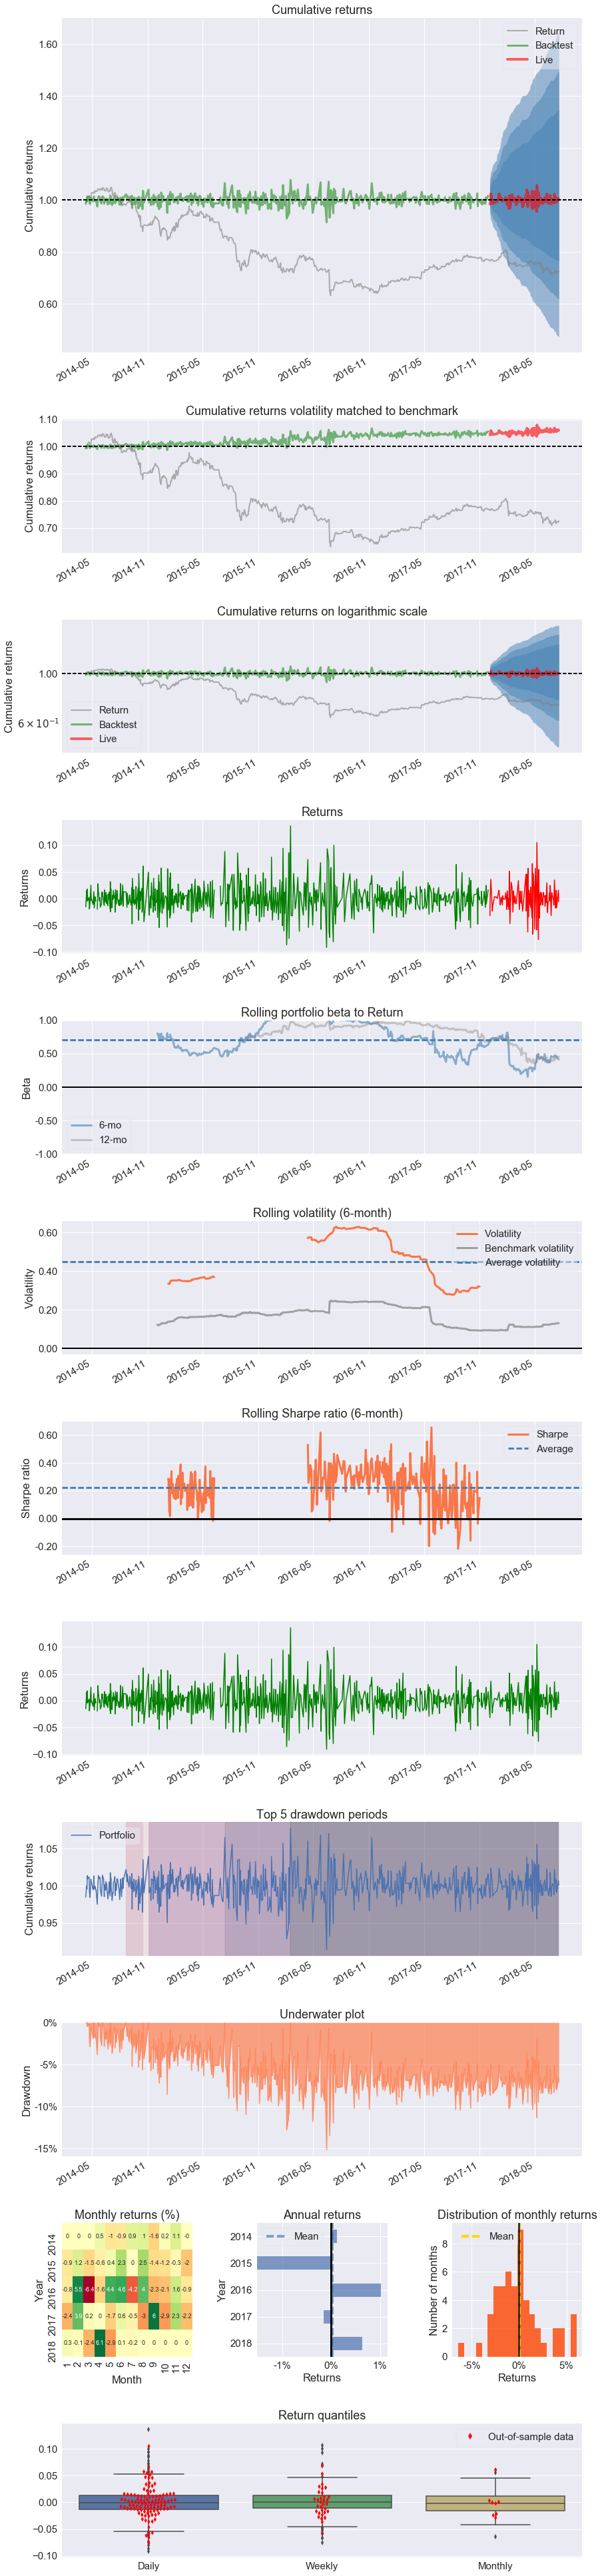

Stress Events,mean,min,max
Apr14,0.05%,-1.92%,2.51%
Oct14,0.06%,-4.30%,6.10%
Fall2015,0.09%,-5.95%,8.55%
New Normal,0.04%,-9.12%,13.59%


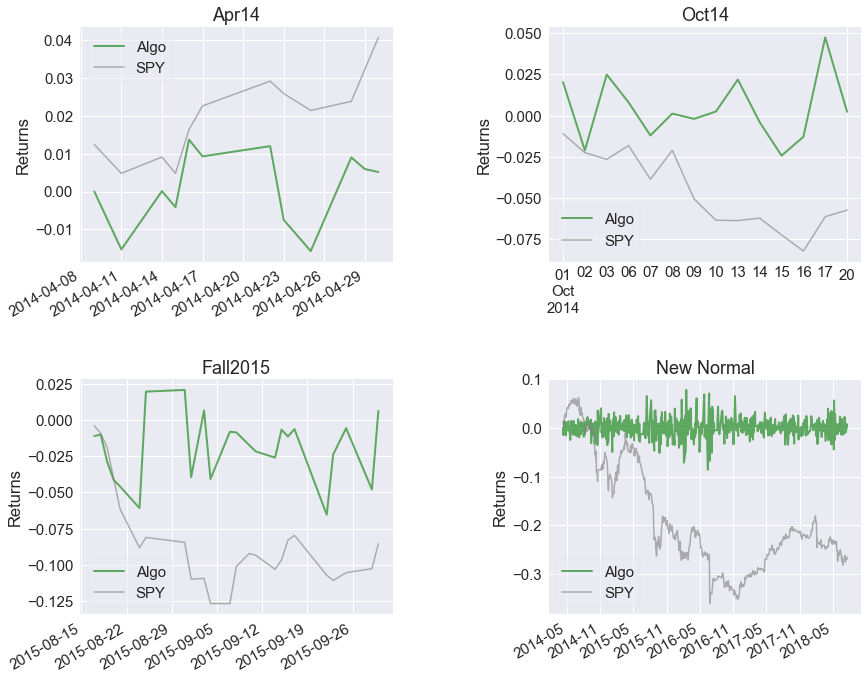

Top 10 long positions of all time,max
SAF,63.52%
ENI,62.95%
SAN,52.22%
ACA,47.71%
BNP,38.57%


Top 10 short positions of all time,max


Top 10 positions of all time,max
SAF,63.52%
ENI,62.95%
SAN,52.22%
ACA,47.71%
BNP,38.57%


All positions ever held,max
SAF,63.52%
ENI,62.95%
SAN,52.22%
ACA,47.71%
BNP,38.57%


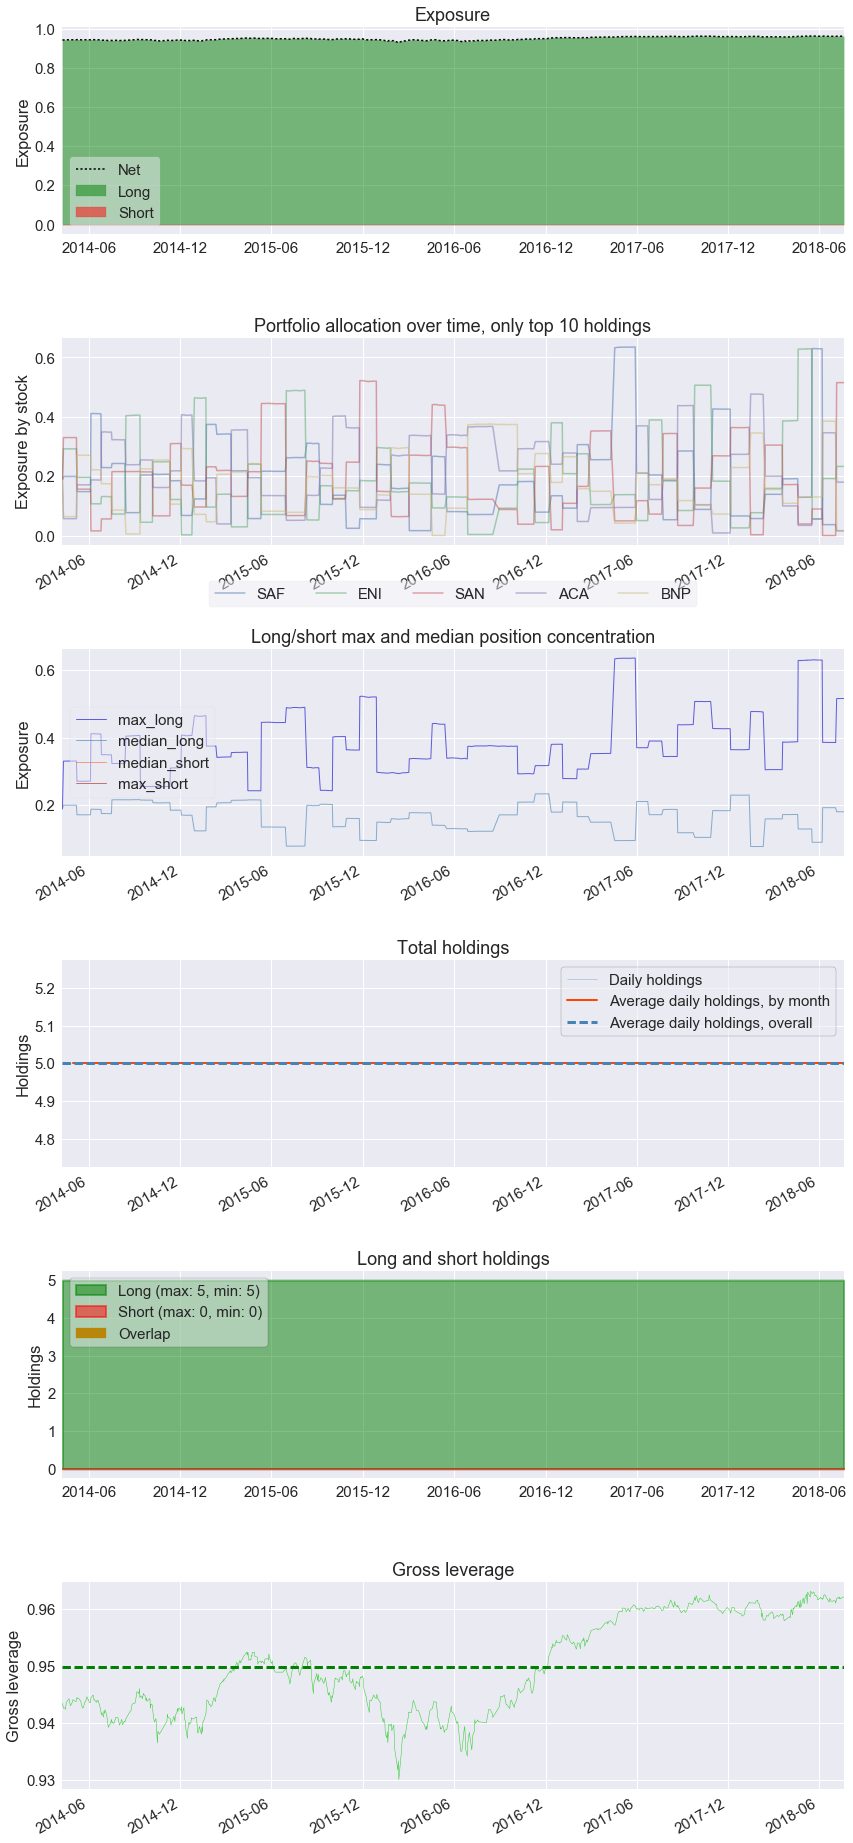

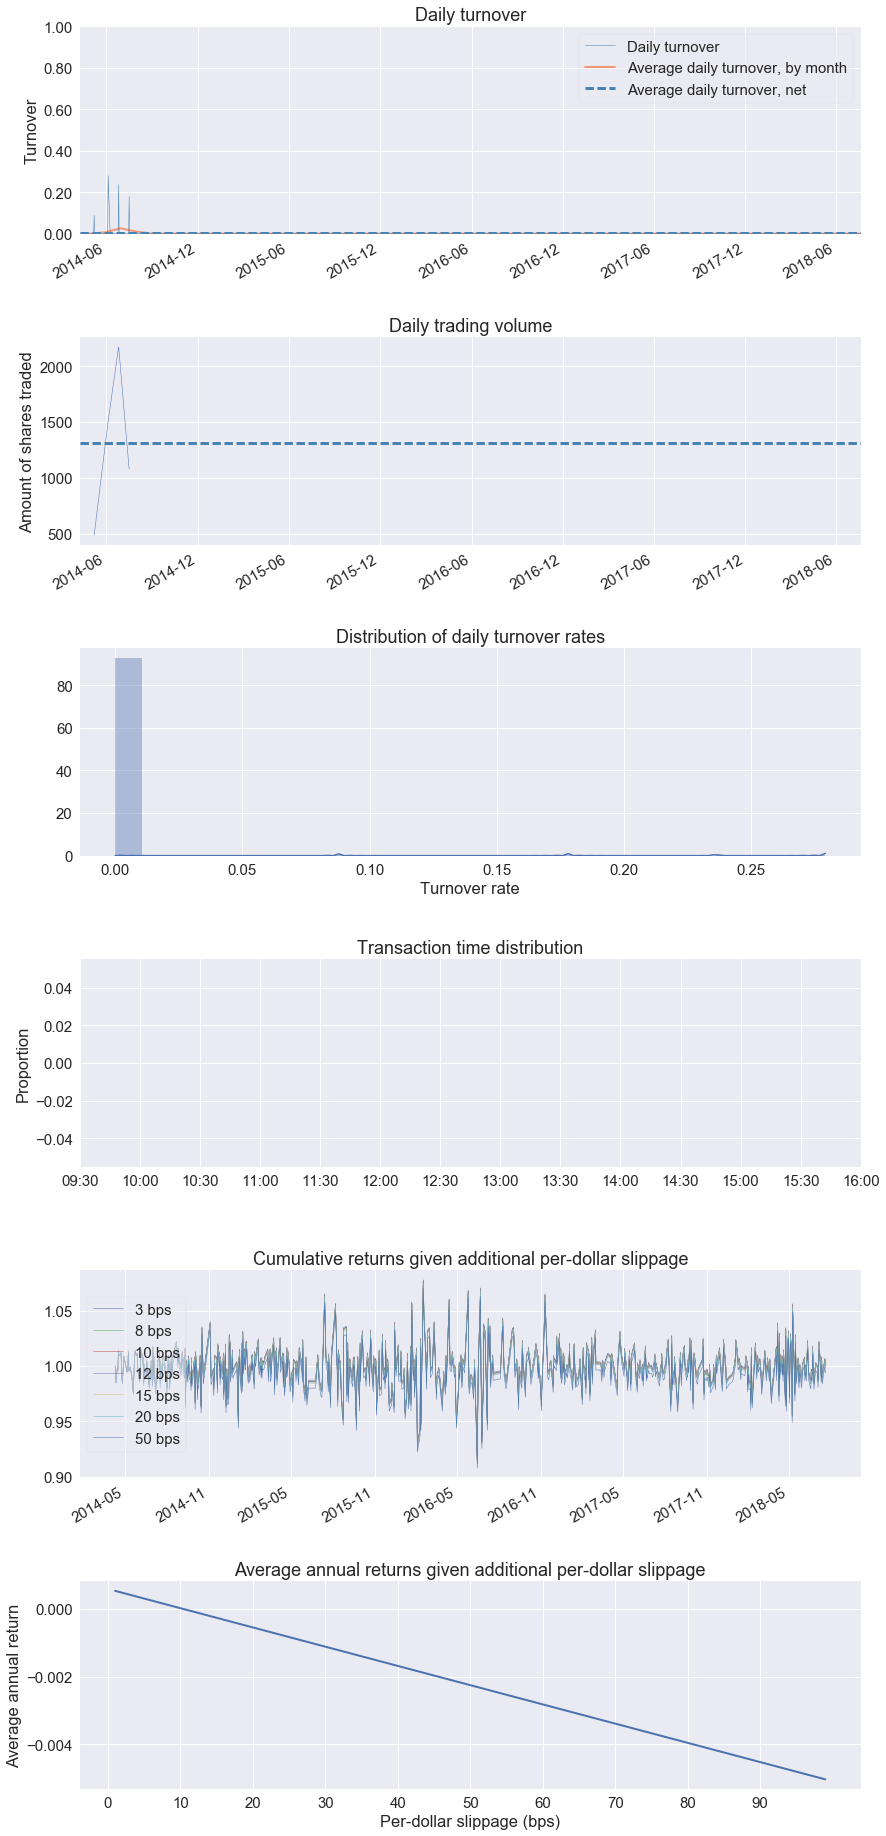

In [434]:
%matplotlib inline
import pyfolio as pf

### FF is faulty so I am replacing it with something else
#pf.plotting.plot_rolling_fama_french = pf.plotting.plot_returns

#pf.create_full_tear_sheet(returns,benchmark_rets=benchmark )

pf.create_full_tear_sheet(returns, positions, transactions, slippage=5,benchmark_rets=benchmark,live_start_date='2017-12-1')

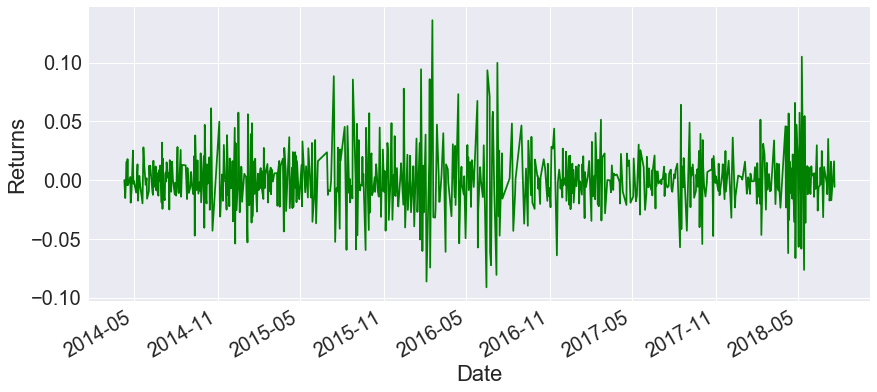

In [436]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=[14, 6])
pf.plotting.plot_rolling_fama_french(returns, ax=ax)